# Inpainting

_Issam Benamara_ & _Ismaël Bonneau_

_mini projet de Master 1 DAC_


L’**inpainting** en image s’attache à la reconstruction d’images détériorées ou au remplissage de parties
manquantes (éliminer une personne ou un objet d’une image par exemple). Cette partie est consacrée
à l’implémentation d’une technique d’inpainting présentée dans <a href="https://www.researchgate.net/publication/220736614_Image_inpainting_via_sparse_representation">[1]</a> utilisant la régression linéaire Lasso (ou L1 régularization) et sa capacité à
trouver une solution sparse en termes de poids. Ces travaux sont inspirés des recherches en
apprentissage de dictionnaire et représentation sparse pour les signaux <a href="https://www.di.ens.fr/willow/events/cvml2010/materials/INRIA_summer_school_2010_Julien.pdf">[2]</a>.

L’idée principale
est de considérer qu’un signal complexe peut être décomposé comme une somme pondérée de signaux
élémentaires. 


### Préambule : régression linéaire, régression ridge et LASSO

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from math import *
import matplotlib.colors as col
import random

%matplotlib inline

In [0]:
def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

In [0]:
def show_usps(data):
    plt.imshow(data.reshape((16,16)),interpolation="nearest",cmap="gray")

def plot_error(datax,datay,f,step=10):
    grid,x1list,x2list=make_grid(xmin=-4,xmax=4,ymin=-4,ymax=4)
    plt.contourf(x1list,x2list,np.array([f(datax,datay,w) for w in grid]).reshape(x1list.shape),25)
    plt.colorbar()
    plt.show()

In [0]:
dtrx , dtry = load_usps("USPS_train.txt")
dtex , dtey = load_usps("USPS_test.txt")

## Linear Regression


In [10]:
#création de notre régression linéaire
reg_lin = linear_model.LinearRegression()
#apprentissage
reg_lin.fit(dtrx, dtry)
#prédiction
pred_train = reg_lin.predict(dtrx)
pred_test = reg_lin.predict(dtex)
#affichage des résultats
#print("Les coefficients sont : ", reg_lin.coef_)
mse_train = mean_squared_error(dtry, pred_train)
mse_test = mean_squared_error(dtey, pred_test)
print("Cout quadratique moyenne (MSE) du train : ", mse_train)
print("Cout quadratique moyenne (MSE) du test : ", mse_test)
print("Score variance train : ", r2_score(dtry, pred_train))
print("Score variance test : ", r2_score(dtey, pred_test))
print("Norme du vecteur de poids : ",np.linalg.norm(reg_lin.coef_))
print("Nombre de composantes non nulles : ",np.count_nonzero(reg_lin.coef_))

Cout quadratique moyenne (MSE) du train :  3.093907292463029
Cout quadratique moyenne (MSE) du test :  3.7549053135627144
Score variance train :  0.6553555286479579
Score variance test :  0.587676847955118
Norme du vecteur de poids :  4.055685527236994
Nombre de composantes non nulles :  256


In [0]:
alpha = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 30, 100]

score train :  [0.6005537444652844, 0.600553744465282, 0.6005537444650306, 0.6005537444398916, 0.6005537419327243, 0.6005534977790301, 0.6005482274230879, 0.6005343305504411, 0.6003224181969172, 0.6000276499631267, 0.5989629035321743, 0.5956283517626567]
score test :  [0.5272420684821543, 0.5272420717549418, 0.5272421044825807, 0.5272424317350398, 0.5272457018715317, 0.5272781699375557, 0.5274178732427441, 0.5275838443570102, 0.5287194304562387, 0.5298599667761579, 0.5328059045263094, 0.536390917723246]


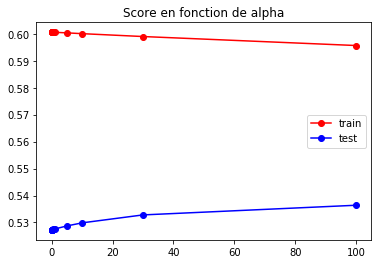

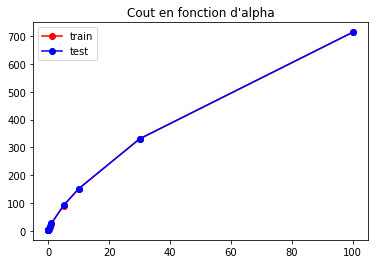

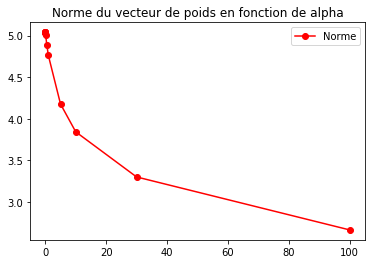

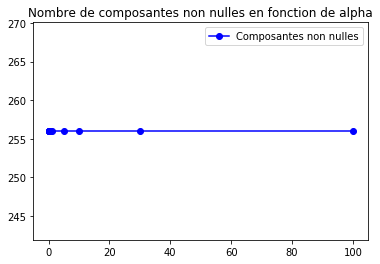

In [18]:
score_train = []
score_test = []
cout_train = []
cout_test = []
normes = []
compo_non_nulles = []

for a in alpha:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(dtrx, dtry)
    score_train.append(ridge.score(dtrx, dtry))
    score_test.append(ridge.score(dtex, dtey))
    
    pred_train = ridge.predict(dtrx) 
    pred_test = ridge.predict(dtex)
    w = sqrt(sum(np.array(ridge.coef_)*np.array(ridge.coef_)))
    cout_train.append(mean_squared_error(dtry, pred_train) + a*(w**2))
    cout_test.append(mean_squared_error(dtey, pred_test) + a*(w**2))
    
    normes.append(np.linalg.norm(ridge.coef_))
    compo_non_nulles.append(np.count_nonzero(ridge.coef_))
    
print("score train : ", score_train)
print("score test : ", score_test)

plt.plot(alpha, score_train, marker="o", color='red', label='train')
plt.plot(alpha, score_test, marker="o", color='blue', label='test')
plt.title("Score en fonction de alpha")
plt.legend()
plt.show()

plt.plot(alpha, cout_train, marker="o", color='red', label="train")
plt.plot(alpha, cout_test, marker="o", color='blue', label="test")
plt.title("Cout en fonction d'alpha")
plt.legend()
plt.show()

plt.plot(alpha, normes, marker="o", color='red', label='Norme')
plt.title("Norme du vecteur de poids en fonction de alpha")
plt.legend()
plt.show()

plt.plot(alpha, compo_non_nulles, marker="o", color='blue', label='Composantes non nulles')
plt.title("Nombre de composantes non nulles en fonction de alpha")
plt.legend()
plt.show()

In [0]:
alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 30, 100]

score train :  [0.6553553235784386, 0.6553373803587835, 0.6544016762328342, 0.6383814885066921, 0.5798095310511047, 0.3616088809949153, 0.09513305231304714, 0.0, 0.0, 0.0, 0.0]
score test :  [0.5877144183249472, 0.5880272843521757, 0.5896197341933744, 0.5909622350606677, 0.5426864689058131, 0.3374014602327009, 0.08680464350227823, -0.00030751695964337245, -0.00030751695964337245, -0.00030751695964337245, -0.00030751695964337245]


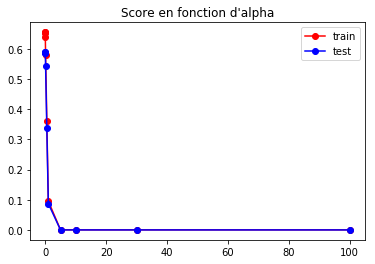

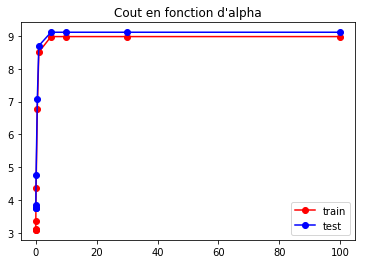

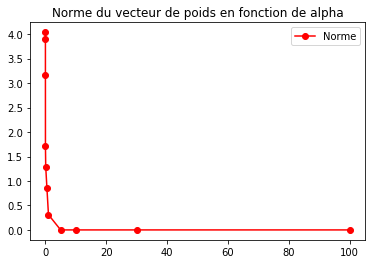

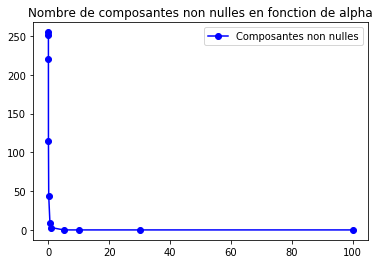

In [23]:
score_test = []
score_train = []
cout_train = []
cout_test = []

normes = []
compo_non_nulles = []

for a in alpha:
    reg_las = linear_model.Lasso(alpha=a, max_iter = 2000)
    reg_las.fit(dtrx, dtry)
    score_test.append(reg_las.score(dtex,dtey))
    score_train.append(reg_las.score(dtrx, dtry))
    
    pred_train = reg_las.predict(dtrx) 
    pred_test = reg_las.predict(dtex)
    w = sum([abs(x) for x in reg_las.coef_])
    cout_train.append(mean_squared_error(dtry, pred_train) + a*w)
    cout_test.append(mean_squared_error(dtey, pred_test) + a*w)
    
    normes.append(np.linalg.norm(reg_las.coef_))
    compo_non_nulles.append(np.count_nonzero(reg_las.coef_))
    
print("score train : ", score_train)
print("score test : ", score_test)

plt.plot(alpha, score_train, marker="o", color='red', label='train')
plt.plot(alpha, score_test, marker="o", color='blue', label='test')
plt.title("Score en fonction d'alpha")
plt.legend()
plt.show()

plt.plot(alpha, cout_train, marker="o", color='red', label="train")
plt.plot(alpha, cout_test, marker="o", color='blue', label="test")
plt.title("Cout en fonction d'alpha")
plt.legend()
plt.show()

plt.plot(alpha, normes, marker="o", color='red', label='Norme')
plt.title("Norme du vecteur de poids en fonction de alpha")
plt.legend()
plt.show()

plt.plot(alpha, compo_non_nulles, marker="o", color='blue', label='Composantes non nulles')
plt.title("Nombre de composantes non nulles en fonction de alpha")
plt.legend()
plt.show()

## inpainting

### Reconstitution à l'aide du LASSO

### Formalisation

Pour une image en 2 dimensions, nous noterons ${p_{i,j} ∈ [0, 1]^3}$
le pixel aux coordonnées ${(i, j)}$ de l’image
exprimée sur 3 canaux : ces 3 canaux sont usuellement le pourcentage de rouge, de vert et de bleu
(RGB) de la couleur, ou sous format teinte, saturation, luminosité (HVS, Hue Saturation Value), plus proche de notre perception visuelle.

Nous appellerons dans la suite un patch un petit carré de l’image de longueur de côté h
(cette longueur sera une constante fixée au préalable). Nous noterons ${Ψ^{p_{i,j}}}$ le patch dont le centre
est le pixel ${p_{i,j}}$ . Ce patch correspond à une matrice 3d (un tenseur) de taille ${h \times h \times 3}$ que l’on
peut voir sans perte de généralité comme un vecteur colonne de taille ${3h^2}$ à partir d’une image de
taille ${(width, height)}$, il est possible de construire l’ensemble des patchs ${Ψ}$ constituant cette image :
${Ψ = {Ψ^{p_{i,j}} ∈ [0, 1]^{3h^2}, i ∈ \left \{{\frac{h}{2} ... width − \frac{h}{2}} \right \}, j ∈ \left \{{\frac{h}{2}... height − \frac{h}{2}}\right \}}}$.

De manière générale en inpainting, une hypothèse fondamentale est qu’une image a une cohérence
spatiale et de texture : un patch ${Ψ^p}$ appartenant à une région cohérente en termes de texture doit
pouvoir être reconstruit à partir d’une pondération des patchs environnants : ${Ψ^p = \sum_{Ψ^{p_k} ∈ Ψ\Ψ^{p}} w_k Ψ^{p}_k}$.


Bien sûr, c'est le grand **Kratos**, fils de Zeus, qui vas nous servir d'exemple d'image à reconstituer. Qui d'autre que lui?

<img src="images/kratos.jpg" >

In [0]:
#constante pour signifier une valeur manquante
MISSING = -100


def read_im(fn) :
    return plt.imread(fn).copy().astype("int32")/255
  
def show_im(arr, figsize = None, title = None):
    arr3 = arr.copy()
    arr3[arr3 == MISSING] = 0
    if figsize != None:
        plt.figure(figsize=figsize)
    else:
        plt.figure()
    if title != None:
        plt.title(title)
    plt.imshow(arr3)
    plt.show()
    
def vecteur(patch):
    """
    transforme un patch en vecteur
    """
    return patch.ravel().copy()
  
def patch(vecteur, h):
    """
    ne marche qu'avec des patchs carrés
    """
    return vecteur.reshape((h , h , 3 ))
  
  
def noise( im_arr , prc  ):
    arr_hole = im_arr.copy()
    nbPixels = arr_hole.shape[0]*arr_hole.shape[1]
    toBlack = random.sample(range(nbPixels),int(nbPixels*prc))
    for pixel in toBlack:
        i = pixel // arr_hole.shape[1]
        j = pixel % arr_hole.shape[1]
        arr_hole[ i, j ] = np.ones(3)*(MISSING)
    return arr_hole
  
def del_rect(img, i, j, height, width):
    res = img.copy()
    for ix in range(i, i+height):
        for jx in range(j, j+width):
            res[ix][jx] = np.ones(3)*(MISSING)
    return res
  
def white_to_missing(img):
    res = img.copy()
    for ix in range(img.shape[0]):
        for jx in range(img.shape[1]):
            if np.prod( res[ix][jx] == np.ones(3)) == 1:
                res[ix][jx] = np.ones(3)*(MISSING)
    return res
  
def get_patch(  i , j , h , im_arr ):
    start_i , start_j = i-h//2 , j-h//2
    return im_arr[ start_i : start_i+h , start_j : start_j+h , : ].copy()
  
def fill_patch(  i , j , h , im_arr, filler_patch ):
    if len(filler_patch) != h:
        return
    start_i , start_j = i-h//2 , j-h//2
    im_arr[ start_i : start_i+h , start_j : start_j+h , : ] = filler_patch
  
def get_all_patches( array_img, h, step ):
    bad_patches = dict()
    good_patches = dict()
    width = array_img.shape[1]
    height = array_img.shape[0]

    i = h//2  
    while i < height :
        j = h//2
        while j < width:
            tmp_patch = get_patch( i, j, h, array_img )
            if tmp_patch.shape != (h,h,3):
                j += step
                continue
            if MISSING in tmp_patch:
                bad_patches[(i,j)] = tmp_patch
            else:
                good_patches[(i,j)] = tmp_patch
            j += step
        i += step

    return bad_patches, good_patches
  
def reconstruct(patches_dict, target_img, h, step ):
    width = target_img.shape[1]
    height = target_img.shape[0]

    a = np.array(list(patches_dict.items()))
    a = a[a[:,0].argsort()]

    lines = []

    c = 0
    for i in range(height//h):
        line = []
        for j in range(width//h):
            line.append(a[c][1])
            c += 1
        lines.append(tuple(line))

    rows = []
    for line in lines:
        rows.append(np.concatenate(line, axis=1))

    rows = tuple(rows)

    return np.concatenate(rows, axis=0)
  
def magic( raw, target, h, step, a = 0.00001, iterations = 1000 ):
  
  bad_patches, good_patches_recon = get_all_patches(raw, h = h, step = h)
  _, good_patches = get_all_patches(raw, h = h, step = step)
  
  X = np.zeros((len(good_patches),np.prod(list(good_patches.values())[0].shape)))
  for i, p in enumerate(good_patches.keys()):
      patch_ = good_patches[p]
      X[i] = vecteur(patch_)
  X = X.T
  
  for k in bad_patches.keys():
      target_patch = bad_patches[k]

      Y = vecteur(target_patch)
      Y = Y.reshape((len(Y),1))

      filter_ = np.where(Y != -100)[0]

      Y_filtered = Y[filter_]
      X_filtered = X[filter_]

      l_app = X_filtered

      l_patch = Y_filtered

      reg_las = linear_model.Lasso(alpha=a, max_iter=iterations)

      reg_las.fit(l_app, l_patch)

      pred = reg_las.predict(X)
      final = Y.ravel()
      pred[filter_] = final[filter_]
      bad_patches[k] = patch(pred,h)
    
  d_final = dict(good_patches_recon)
  d_final.update(bad_patches)

  reconstructed = reconstruct(d_final, raw, h, h )
  show_im(raw, title = 'Dirty')
  show_im(reconstructed, title = 'Reconstructed')
  show_im(target, title = 'Target')
  
  return reconstructed

def magic_local( raw, target, tp_i, tp_j, tp_h, step, a = 0.00001, iterations = 1000 ):
  
  _, good_patches = get_all_patches(raw, h = tp_h, step = step)
  
  X = np.zeros((len(good_patches),np.prod(list(good_patches.values())[0].shape)))
  for i, p in enumerate(good_patches.keys()):
      patch_ = good_patches[p]
      X[i] = vecteur(patch_)
  X = X.T
  
  bad_patch = get_patch(tp_i, tp_j, tp_h, raw)
  
  target_patch = bad_patch

  Y = vecteur(target_patch)
  Y = Y.reshape((len(Y),1))

  filter_ = np.where(Y != -100)[0]

  Y_filtered = Y[filter_]
  X_filtered = X[filter_]

  l_app = X_filtered

  l_patch = Y_filtered

  reg_las = linear_model.Lasso(alpha=a, max_iter=iterations)

  reg_las.fit(l_app, l_patch)

  pred = reg_las.predict(X)
  final = Y.ravel()
  pred[filter_] = final[filter_]
  bad_patch = patch(pred,tp_h)
    
  reconstructed = raw.copy()
  
  fill_patch(tp_i,tp_j,tp_h,reconstructed,bad_patch)

  show_im(raw, title = 'Dirty')
  show_im(reconstructed, title = 'Reconstructed')
  show_im(target, title = 'Target')
  
  return reconstructed

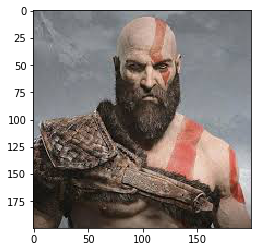

In [137]:
array_img =  read_im("kratos.jpg")
array_img = array_img [:200][:,20:220]
show_im ( array_img )

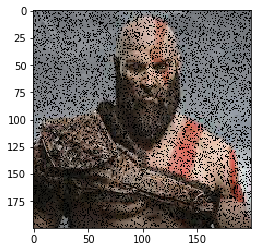

In [28]:
noisy_img = noise(array_img,0.2)
show_im(noisy_img)

Construisons tous les patches de taille h = 40 avec un pas step = 5 à partir de l'image entière, pour les utiliser en tant que dictionnaire

In [42]:
bad_patches, good_patches = get_all_patches(array_img, h = 40, step = 5)
len(bad_patches), len(good_patches)

(0, 1089)

Essayons de reconstruire ce patch en utilisant le dictionnaire ( tous les patches de l'image, sauf le patch objectif qu'on va supprimer du dictionnaire )

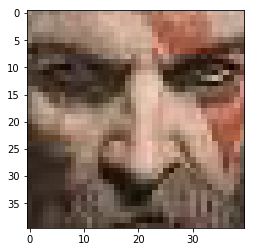

In [43]:
target_patch = get_patch( i = 60 , j = 105 , h = 40, im_arr = array_img )
show_im(target_patch)

Supprimons le patch objectif du dictionnaire pour eviter d'avoir un vecteur poids nulle partout avec un seul '1' qui va pondérer le patch objectif lui meme au maximum


In [0]:
del good_patches[(60,105)]

Convertissons tous les patches du dictionnaire en une matrice pour l'utiliser dans la régression LASSO.

Dans notre cas on obtient une matrice 4800 x 1088 ce qui s'explique par :
- Un patch de h = 40 est converti en un vecteur colonne 40x40x3 = 4800
- Nous avons 1088 patches dans le dictionnaire

Donc chaque colonne correspond a un patch et chaque ligne correspond à une couche d'un pixel donné.

In [57]:
X = np.zeros((len(good_patches),np.prod(target_patch.shape)))
for i, p in enumerate(good_patches.keys()):
    patch_ = good_patches[p]
    X[i] = vecteur(patch_)
X = X.T
X.shape

(4800, 1088)

De même pour le patch objectif ( un seul vecteur colonne donc 4800 x 1)

In [58]:
Y = vecteur(target_patch)
Y = Y.reshape((len(Y),1))
Y.shape

(4800, 1)

**Résultat**

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


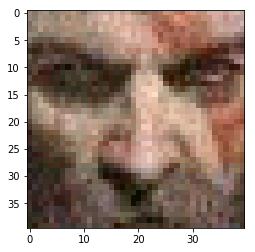

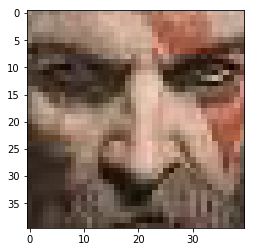

In [64]:
a = 0.0000001
l_app = X

l_patch = Y

reg_las = linear_model.Lasso(alpha=a, max_iter=1000)

reg_las.fit(X, Y)

w = reg_las.coef_

pred = reg_las.predict(l_app)

sum_w = sum([abs(x) for x in w])

cout = mean_squared_error(l_patch, pred) + a*sum_w

show_im(patch(pred,40))
show_im(target_patch)

Maintenant essayons juste de completer l'image avec des pixels manquants en utilisant toujours l'image correcte complete comme dictionnaire


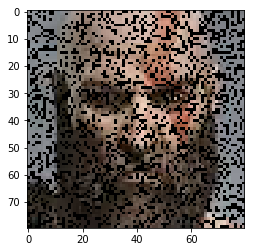

In [67]:
target_patch = noise(get_patch( i = 60 , j = 105 , h = 80, im_arr = array_img ), 0.3 )
show_im(target_patch)

In [69]:
bad_patches, good_patches = get_all_patches(array_img, h = 80, step = 5)
del good_patches[(60,105)]
len(bad_patches), len(good_patches)

(0, 624)

In [70]:
X = np.zeros((len(good_patches),np.prod(target_patch.shape)))
for i, p in enumerate(good_patches.keys()):
    patch_ = good_patches[p]
    X[i] = vecteur(patch_)
X = X.T
X.shape

(19200, 624)

In [71]:
Y = vecteur(target_patch)
Y = Y.reshape((len(Y),1))
Y.shape

(19200, 1)

On filtre les patches selon les pixels présents dans le patch objectif, pour n'appliquer la régression que sur les pixels présents

In [72]:
filter_ = np.where(Y != -100)[0]

Y_filtered = Y[filter_]
X_filtered = X[filter_]

Y_filtered.shape, X_filtered.shape

((13440, 1), (13440, 624))

In [73]:
a = 0.00001
l_app = X_filtered

l_patch = Y_filtered

reg_las = linear_model.Lasso(alpha=a)

reg_las.fit(l_app, l_patch)

w = reg_las.coef_

pred = reg_las.predict(l_app)

sum_w = sum([abs(x) for x in w])

cout = mean_squared_error(l_patch, pred) + a*sum_w

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


On remplace les pixels manquants dans l'objectif par les pixels prédits

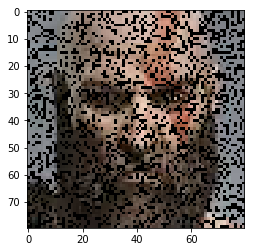

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


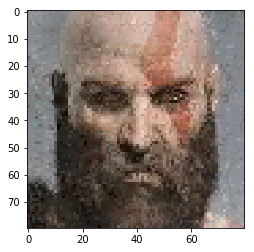

In [74]:
pred = reg_las.predict(X)
final = Y.ravel()
show_im(patch(final,80))
pred[filter_] = final[filter_]
show_im(patch(pred,80))

**Généralisation**

Maintenant au lieu de considèrer comme dictionnaire l'image correcte au complet ( c'est impossible en réalité sinon on ne chercherait pas à corriger le bruit ou les pixels manquants ) on va considérer les patches 'propres' de l'image en tant que dictionnaire.

Nous allons donc utiliser le meme processus qu'avant mais tout est inclus dans une fonction pour ne faire qu'un seul appel.

Testons avec cette image ( remarquez le taux de bruitage plutot elevé et l'utilisation d'une taille de patch petite pour tenter d'obtenir le maximum de patches propres )


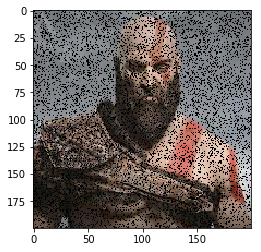

In [75]:
noisy_img = noise(array_img,0.2)
show_im(noisy_img)

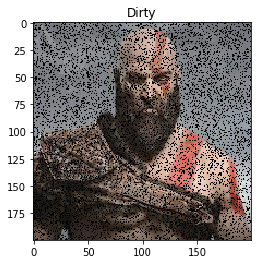

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


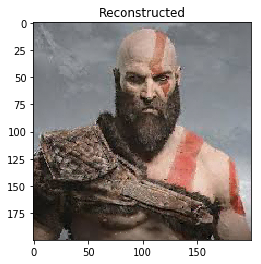

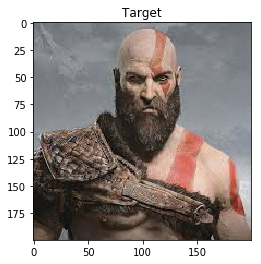

In [80]:
_ = magic(noisy_img, array_img, h = 5, step = 5)

Passons à un test plus aggressif en supprimant tout un groupe de pixels adjacents et essayer de 'remplir' le vide

**Attention** il faut que h soit assez grand pour couvrire strictement les pixels manquants, sinon comme patch objectif nous allons avoir un patch tout vide donc durant la régression nous allons avoir zéro pixels correctes comme objectif.
.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

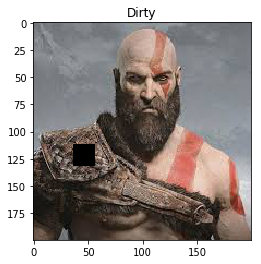

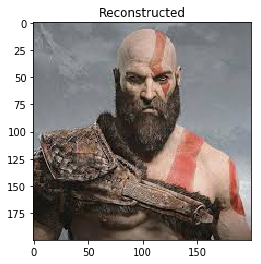

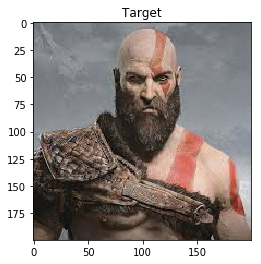

In [82]:
missing_rect_img = del_rect(array_img, i = 112, j = 37, height = 20, width = 20)
_ = magic(missing_rect_img, array_img, h = 40, step = 10, iterations = 1000 )

**Remarque**

lorsque les modeles ne converges pas on arrive à voir 4 warnings, indiquant que meme avec un h qui couvre totalement, le quadrillage de notre image à fait en sorte qu'on aie 4 patches incorrectes ( on peut s'imaginer que chaque patche contienne un coins du rectangle manquant ).

On peut donc envisager une autre manière moins générale, on spécifie exactement quelle partie de l'image on souhaite traiter au lieu de chercher automatiquement tous les patches incorrectes et les corriger.

par exemple essayons juste de corriger ce patch :

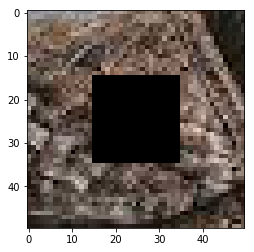

In [135]:
show_im(get_patch(122,47,50,missing_rect_img))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


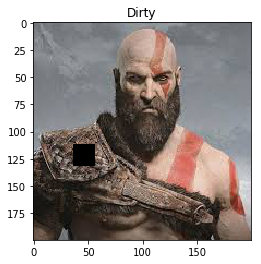

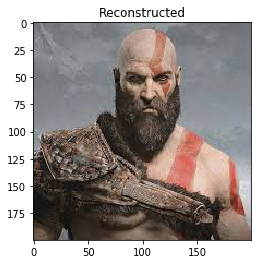

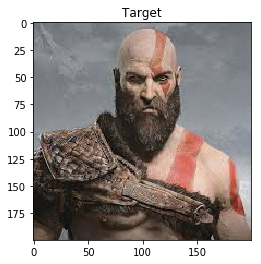

In [140]:
_ = magic_local(missing_rect_img, array_img, tp_i = 122, tp_j = 47, tp_h = 60, step = 5, iterations = 1000 )

C'est déja plus rapide que la méthode générale, mais vu l'emplacement de la zone supprimé c'est normale que le résultat ne soit pas parfait vu l'inexistence d'une autre zone très ressemblante dans l'image.

Essayons maintenant avec une image qui contient des pattern

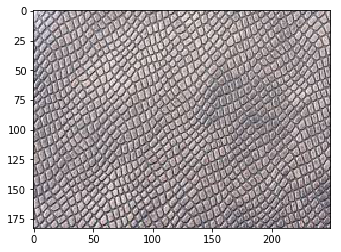

In [141]:
skin =  read_im("skin.jpg")
skin = skin [:190][:,:250]
show_im ( skin )

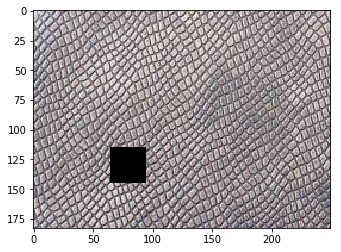

In [142]:
cachee = del_rect(skin, 115,65,30,30)
show_im(cachee)

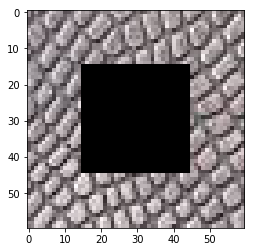

In [147]:
show_im(get_patch(130,80,60,cachee))

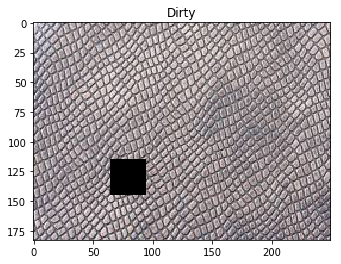

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


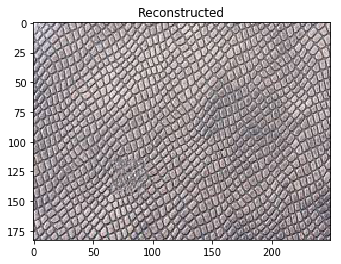

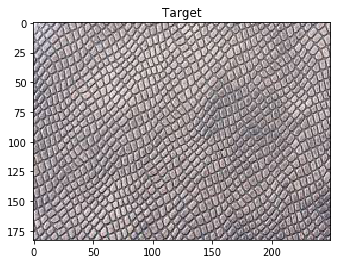

In [148]:
_ = magic_local(cachee, skin, tp_i = 130, tp_j = 80, tp_h = 60, step = 5, a = 0.000001, iterations = 2000 )

Essayons maintenant la suppression d'un element de l'image avec remplissage du fond qui prend en compte le contentu

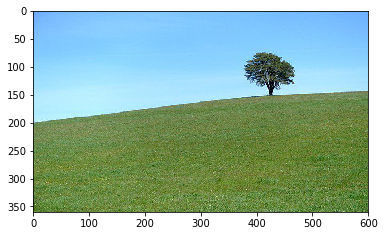

In [149]:
arbre =  read_im("arbre.jpg")
arbre = arbre[:,:600]
show_im(arbre)

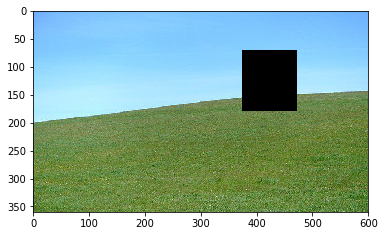

In [150]:
cachee = del_rect(arbre, 70,375,110,97)
show_im(cachee)

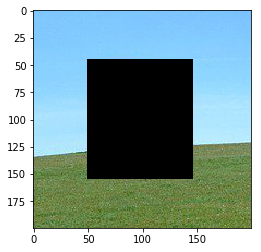

In [159]:
target = get_patch(125,425,200,cachee)
show_im(target)

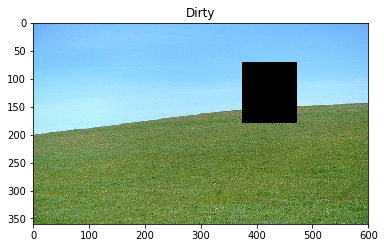

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


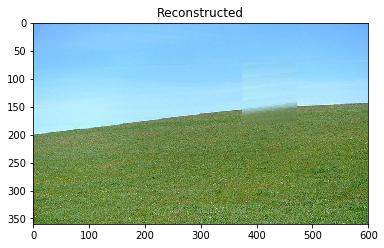

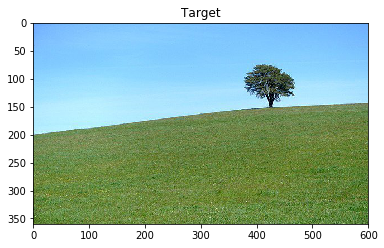

In [172]:
_ = magic_local(cachee, arbre, tp_i = 125, tp_j = 425, tp_h = 200, step = 20, a = 0.00000001, iterations = 1000 )

In [175]:
!zip arf_data.zip *

  adding: arbre.jpg (deflated 2%)
  adding: kratos.jpg (deflated 0%)
  adding: skin.jpg (deflated 0%)
  adding: USPS_test.txt (deflated 75%)
  adding: USPS_train.txt (deflated 75%)
